<span style="font-size: 24px; font-weight: bold;">Step 1: Phase 1: Problem Definition and Data Preparation</span></br>
**Step 1: Describe the Dataset and Its Attributes!**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                        # data visualisation
import seaborn as sns                                  # much better option of data visualisation
from sklearn.preprocessing import LabelEncoder  #to convert binary values into numerical
from sklearn.preprocessing import StandardScaler       # to standardize the features
from scipy.stats import ttest_ind                      # for t-test-hypothsis
from scipy.linalg import svd                           # Singular Value Decomposition
from sklearn.model_selection import train_test_split   # for splitting data into training and testing parts
from sklearn.linear_model import LinearRegression      # to apply linear regression model
from sklearn.metrics import mean_squared_error, r2_score # to check differnce between actual value and predicted values

# Loading the dataset
df_student = pd.read_csv('student-mat.csv', sep=";")

In [56]:
# Looking closer to data set:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [58]:
df_student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df_student.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [73]:
df_student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


<span style="font-size: 24px; font-weight: bold;">Step 2: Data Preprocessing!</span>

In [10]:
# Check for missing values
missing_values = df_student.isnull().sum()
print(missing_values)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [55]:
 #checking duplicate values
duplicate_rows_df=df_student[df_student.duplicated()]
print("number of duplicated rows: ", duplicate_rows_df)

number of duplicated rows:  Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]


In [57]:
df_student.count()

school        395
sex           395
age           395
address       395
famsize       395
Pstatus       395
Medu          395
Fedu          395
Mjob          395
Fjob          395
reason        395
guardian      395
traveltime    395
studytime     395
failures      395
schoolsup     395
famsup        395
paid          395
activities    395
nursery       395
higher        395
internet      395
romantic      395
famrel        395
freetime      395
goout         395
Dalc          395
Walc          395
health        395
absences      395
G1            395
G2            395
G3            395
dtype: int64

In [4]:
# Step 1: Handle Missing Values
# Check for missing values-Optional as there is no null value but just trying
#missing_values = df_student.isnull().sum()
#print("Missing Values in Each Column:")
#print(missing_values[missing_values > 0])


# Step 2: Encoding Categorical Variables
# Identify categorical columns first
categorical_cols = df_student.select_dtypes(include='object').columns
print(categorical_cols)

#converting binary catagorical values into numerical values
binary_encoding_col=["sex","famsize","address","Pstatus","schoolsup","school","paid","famsup",
"activities","higher","internet","romantic"]
bi_col=LabelEncoder()
for col in binary_encoding_col:
   df_student[col]=bi_col.fit_transform(df_student[col])

# Applying one-hot encoding to categorical variables
categ_data_encoded = pd.get_dummies(df_student, columns=categorical_cols, drop_first=True)

# Step 3: Standardize Numerical Features

# Separate features and target variable
X = categ_data_encoded.drop('G3', axis=1)  # Dropping the target variable
y = categ_data_encoded['G3']  # Target variable given to y

print("Encoded data set:", X)
X.info()
# Standardize the features
scaler = StandardScaler()
X_scaledfeatures = scaler.fit_transform(X)

# Display the preprocessed data
print("Preprocessed Data is ready:")
print(X_scaledfeatures[:5])  # Show first 5 rows of scaled features to get an idea

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')
Encoded data set:      age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         3       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
390   20     2     2           1          2         2       5         5   
391   17     3     1           2          1         0       2         4   
392   21     1     1           1          1         3       5         5   
393   18  

<span style="font-size: 24px; font-weight: bold;">Phase 2: Exploratory Data Analysis (EDA)</span></br>
**Step 1: Examine Distributions and Summary Statistics**</br>

In [77]:
# Display summary statistics for numerical variables
print("Summary Statistics for Numerical Features:")
print(df_student.describe())

Summary Statistics for Numerical Features:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139

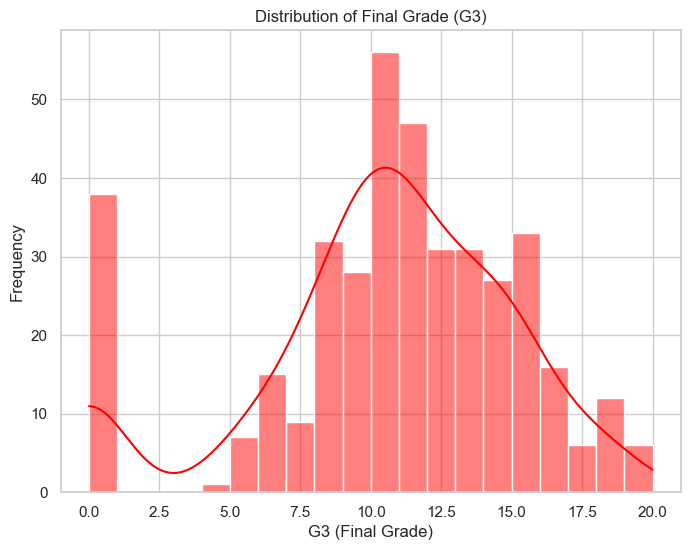

In [75]:
# Set plot style
sns.set(style="whitegrid")
# Plot distribution of the target variable (G3)
plt.figure(figsize=(8,6))
sns.histplot(df_student['G3'], kde=True, bins=20, color='red')
plt.title("Distribution of Final Grade (G3)")
plt.xlabel("G3 (Final Grade)")
plt.ylabel("Frequency")
plt.show()

**Step 2: Examine Relationships Between Variables**</br>
**Correlation Heatmap*</br>.


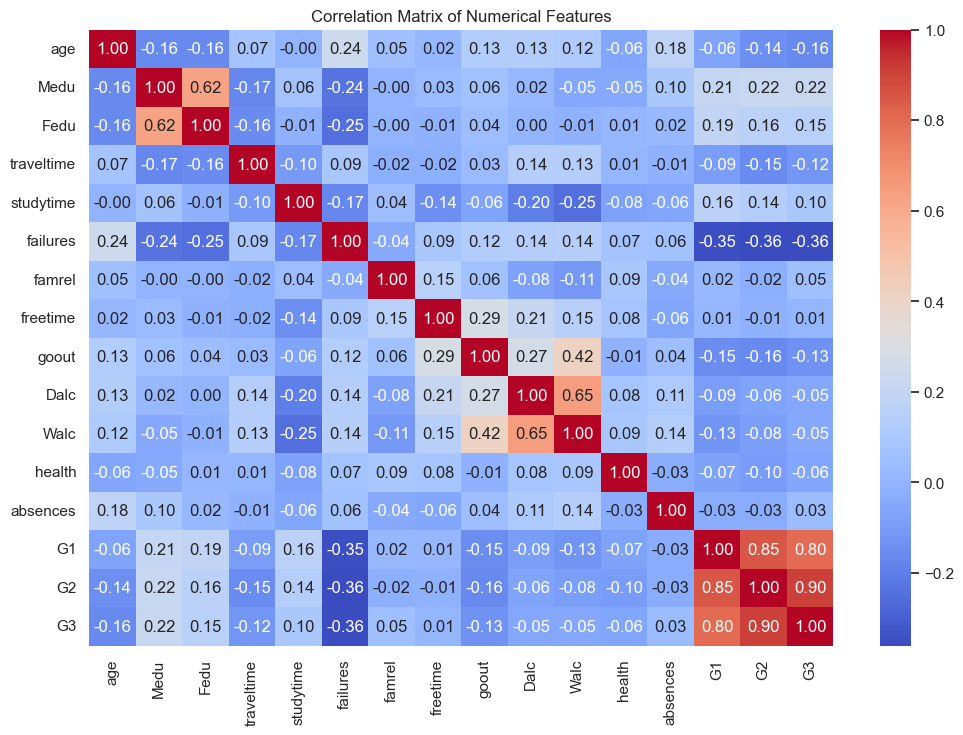

In [10]:
# Exclude non-numeric columns before computing the correlation matrix
numeric_df = df_student.select_dtypes(include=[np.number])

# Computing the correlation matrix
corr_matrix = numeric_df.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

**Step 3: Relationships Between Categorical Variables and G3**</br>
**Boxplots for Categorical Features**</br>

/var/folders/dr/1bzgzd9x3l3_7v3f542c9psh0000gn/T/ipykernel_1215/1956694983.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='G3', data=df_student, palette='coolwarm')
/var/folders/dr/1bzgzd9x3l3_7v3f542c9psh0000gn/T/ipykernel_1215/1956694983.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='famsize', y='G3', data=df_student, palette='viridis')
/var/folders/dr/1bzgzd9x3l3_7v3f542c9psh0000gn/T/ipykernel_1215/1956694983.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medu', y='G3', data=df_student, palette='pastel')


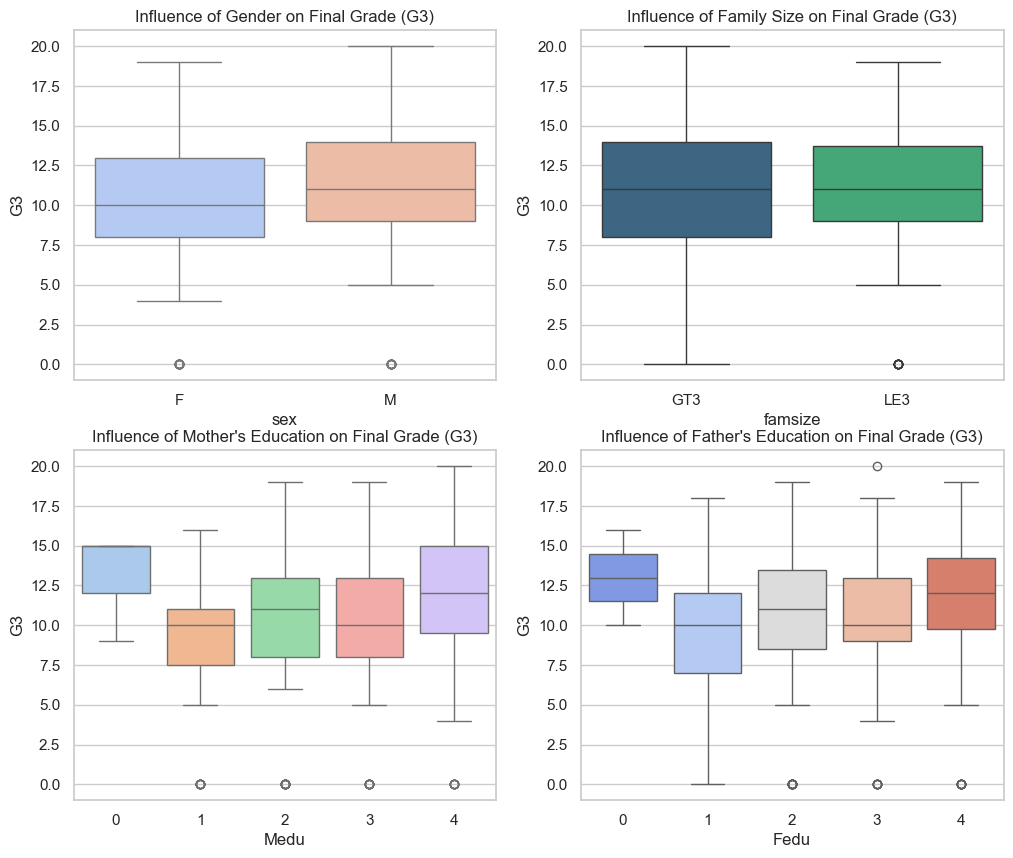

In [105]:
# df_student is DataFrame
plt.figure(figsize=(12, 10))

# Plot impact of sex-feature on G3
plt.subplot(2, 2, 1)
sns.boxplot(x='sex', y='G3', data=df_student, palette='coolwarm')
plt.title("Influence of Gender on Final Grade (G3)")

# Plot impact of family size on G3
plt.subplot(2, 2, 2)
sns.boxplot(x='famsize', y='G3', data=df_student, palette='viridis')
plt.title("Influence of Family Size on Final Grade (G3)")

# Plot impact of mother's education on G3
plt.subplot(2, 2, 3)
sns.boxplot(x='Medu', y='G3', data=df_student, palette='pastel')
plt.title("Influence of Mother's Education on Final Grade (G3)")

# Plot impact of father's education on G3
plt.subplot(2, 2, 4)
sns.boxplot(x='Fedu', y='G3', data=df_student, palette='coolwarm')
plt.title("Influence of Father's Education on Final Grade (G3)")


#plt.tight_layout()
plt.show()

**Step 4: Probability and Statistical Analysis**</br>
**Hypothesis Testing: Does Gender Affect Final Grades?**</br.


In [53]:

# Separate data by gender/sex
female_grades = df_student[df_student['sex'] == 'F']['G3']
male_grades = df_student[df_student['sex'] == 'M']['G3']


# Perform t-test
t_stat, p_value = ttest_ind(male_grades, female_grades)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between final grades of male and female.")
else:
    print("There is no statistically significant difference between final grades of male and female.")

T-statistic: 2.0620, P-value: 0.0399
There is a statistically significant difference between final grades of male and female.


/var/folders/dr/1bzgzd9x3l3_7v3f542c9psh0000gn/T/ipykernel_1215/2764058680.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='guardian', y='G3', data=df_student, palette='coolwarm')
/var/folders/dr/1bzgzd9x3l3_7v3f542c9psh0000gn/T/ipykernel_1215/2764058680.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='internet', y='G3', data=df_student, palette='viridis')
/var/folders/dr/1bzgzd9x3l3_7v3f542c9psh0000gn/T/ipykernel_1215/2764058680.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mjob', y='G3', data=df_student , palette='pa

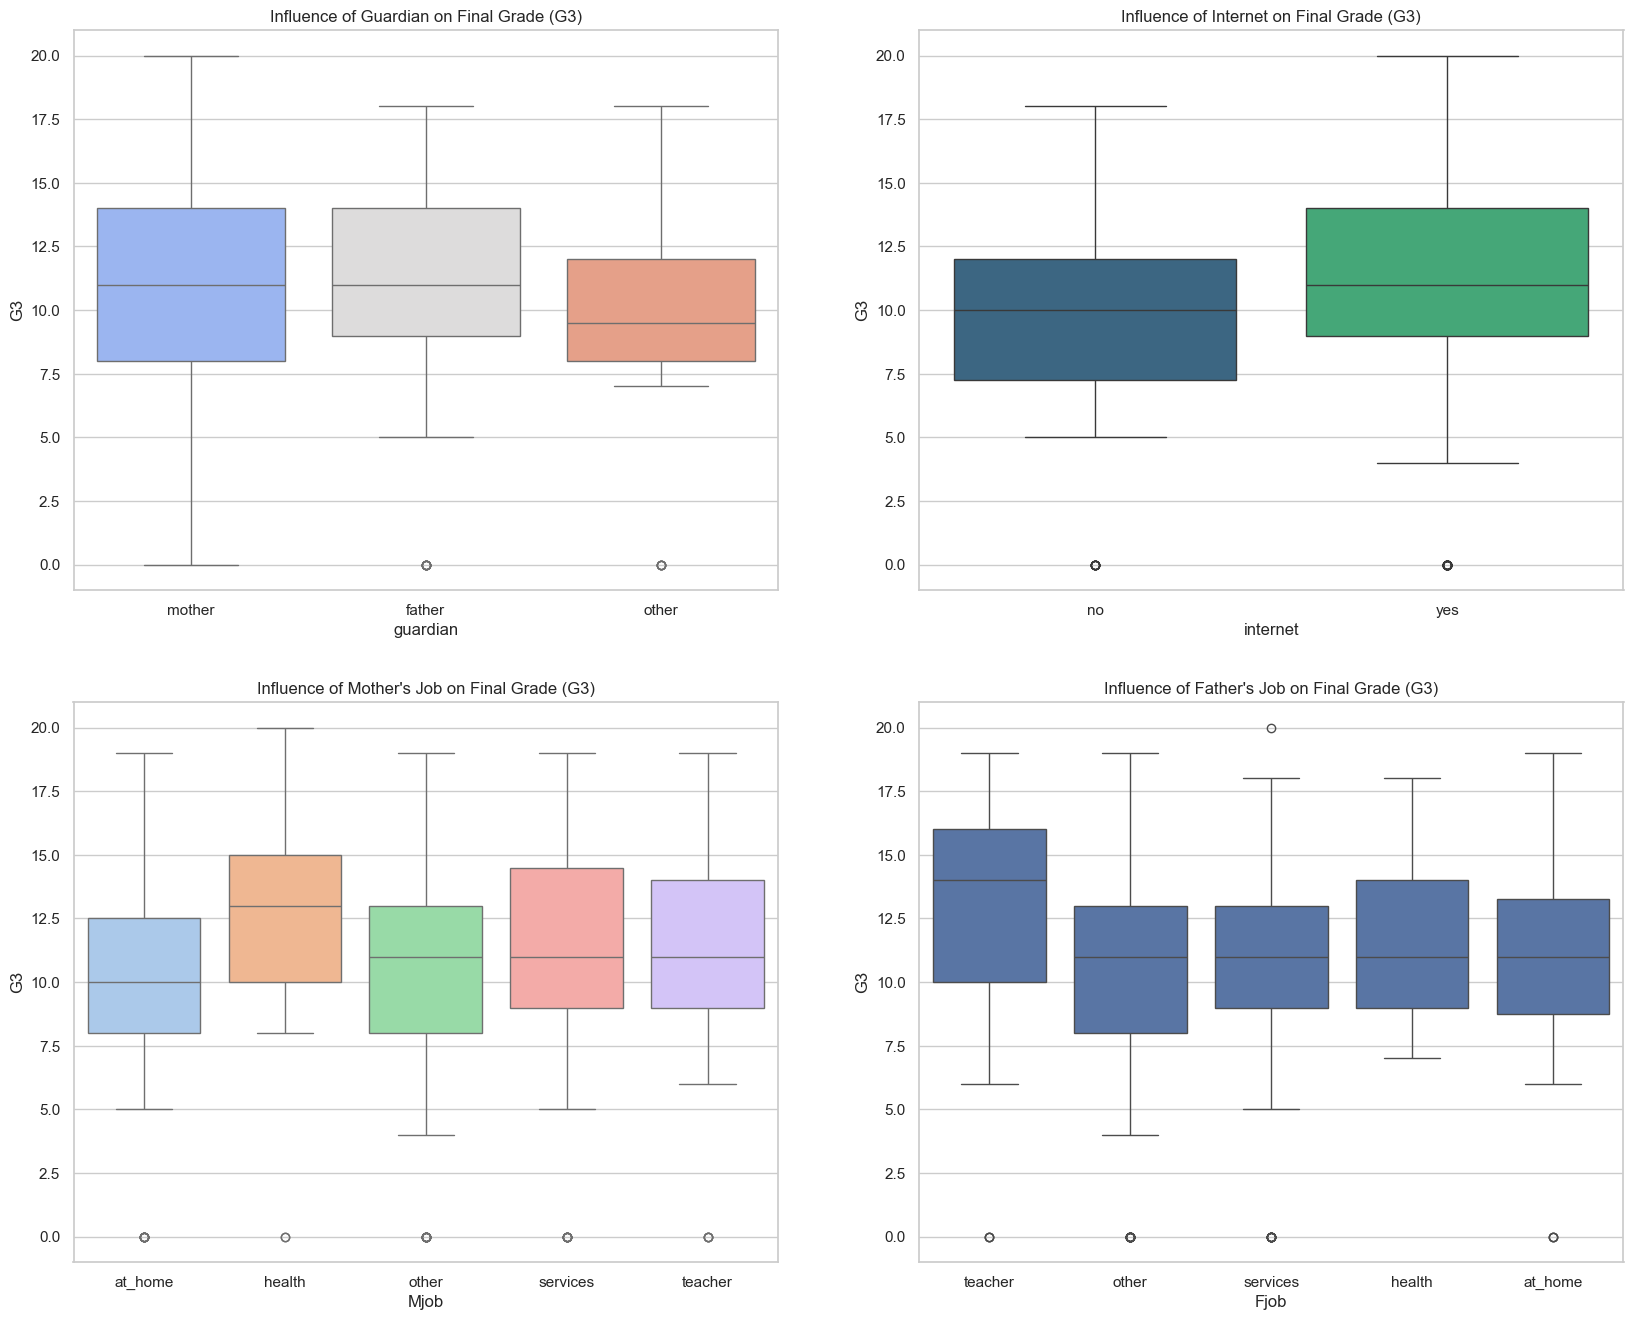

In [103]:
# df_student is DataFrame
plt.figure(figsize=(20, 16))

# Plot impact of sex-feature on G3
plt.subplot(2, 2, 1)
sns.boxplot(x='guardian', y='G3', data=df_student, palette='coolwarm')
plt.title("Influence of Guardian on Final Grade (G3)")

# Plot impact of family size on G3
plt.subplot(2, 2, 2)
sns.boxplot(x='internet', y='G3', data=df_student, palette='viridis')
plt.title("Influence of Internet on Final Grade (G3)")

# Plot impact of mother's education on G3
plt.subplot(2, 2, 3)
sns.boxplot(x='Mjob', y='G3', data=df_student , palette='pastel')
plt.title("Influence of Mother's Job on Final Grade (G3)")

# Plot impact of father's education on G3
plt.subplot(2, 2, 4)
sns.boxplot(x='Fjob', y='G3', data=df_student)
plt.title("Influence of Father's Job on Final Grade (G3)")


#plt.tight_layout()
plt.show()

**Step 5: Scatter Plots to Analyze Relationships Between Variables**</br>


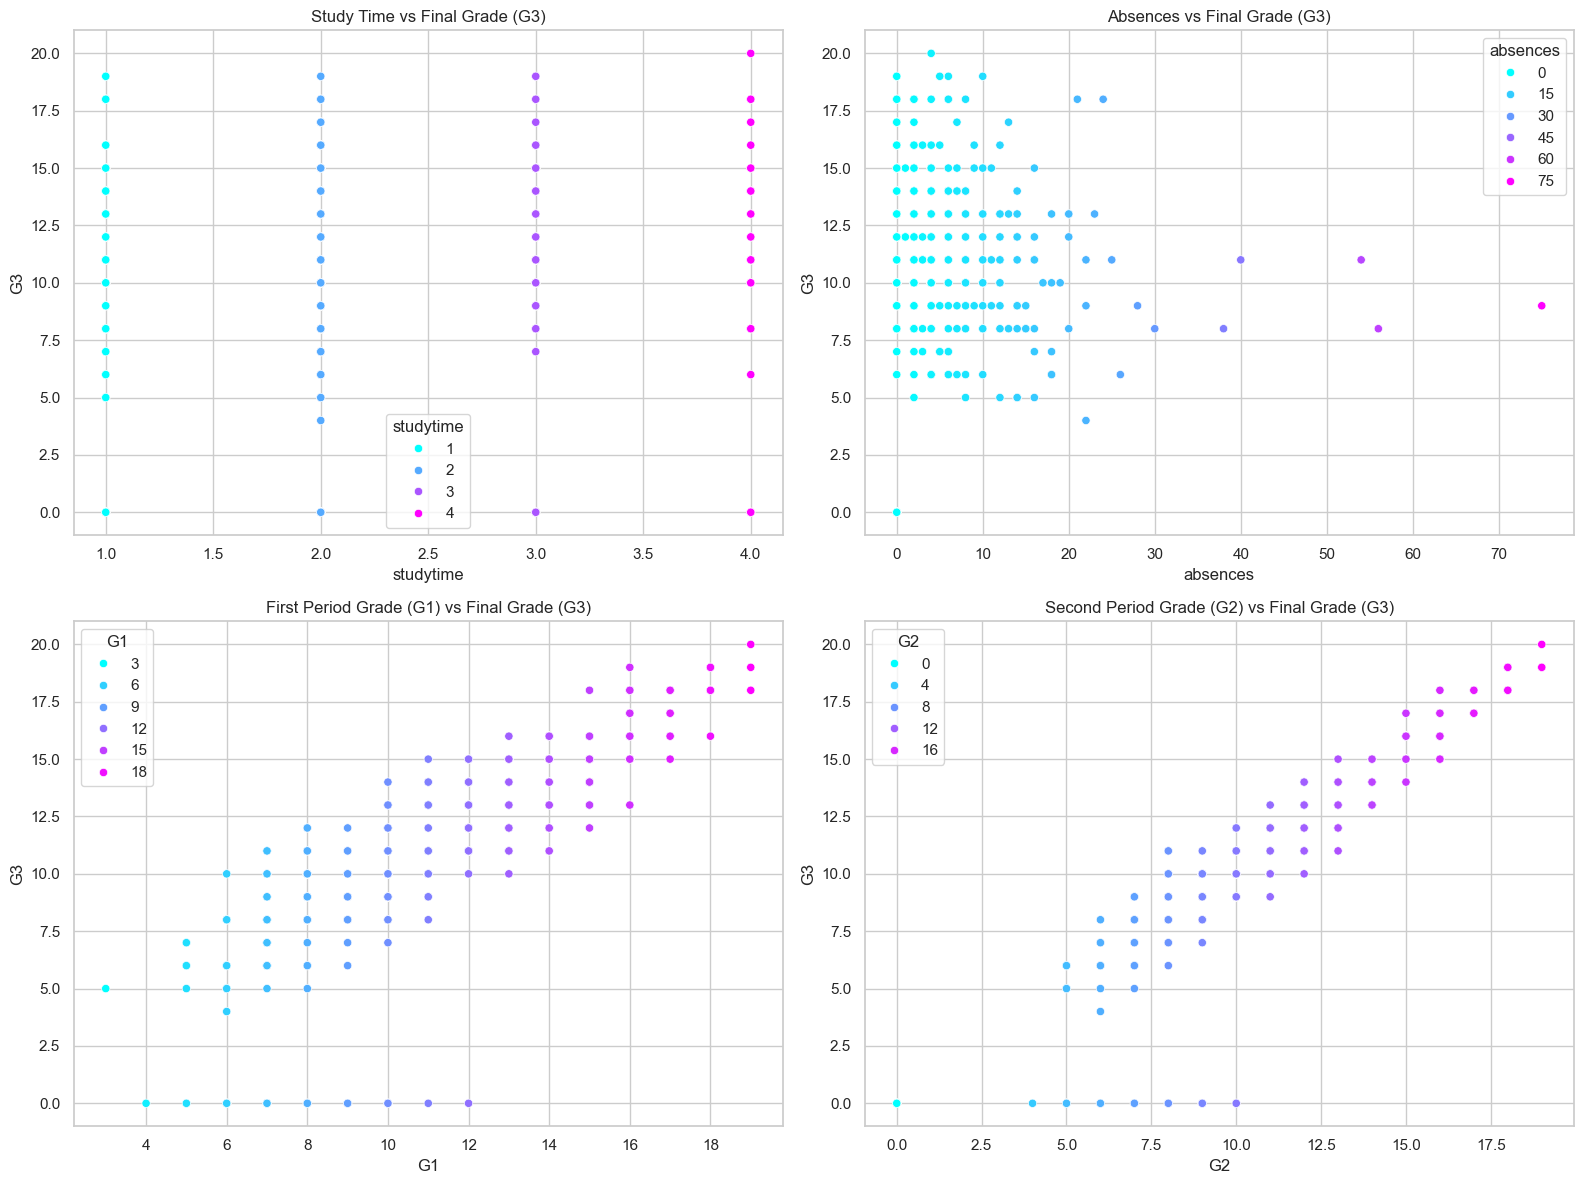

In [15]:
plt.figure(figsize=(16, 12))

# Scatter plot for study time vs G3
plt.subplot(2, 2, 1)
sns.scatterplot(x='studytime', y='G3', data=df_student, hue='studytime', palette='cool')
plt.title("Study Time vs Final Grade (G3)")

# Scatter plot for absences vs G3
plt.subplot(2, 2, 2)
sns.scatterplot(x='absences', y='G3', data=df_student, hue='absences', palette='cool')
plt.title("Absences vs Final Grade (G3)")

# Scatter plot for G1(First Period Grades) vs G3
plt.subplot(2, 2, 3)
sns.scatterplot(x='G1', y='G3', data=df_student, hue='G1', palette='cool')
plt.title("First Period Grade (G1) vs Final Grade (G3)")

# Scatter plot for G2 (Second period grade) vs G3
plt.subplot(2, 2, 4)
sns.scatterplot(x='G2', y='G3', data=df_student, hue='G2', palette='cool')
plt.title("Second Period Grade (G2) vs Final Grade (G3)")

plt.tight_layout()
plt.show()

**Step 6: Distribution of Students by Study Time and Activities**</br>.


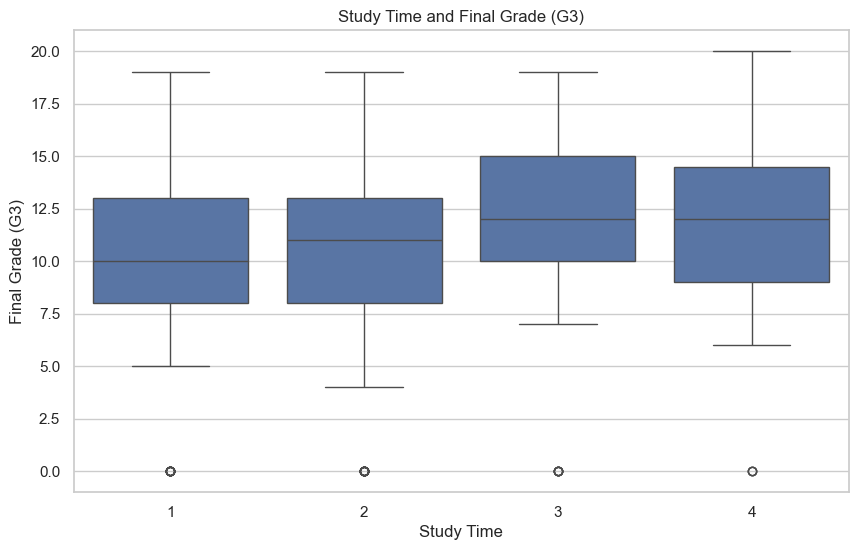

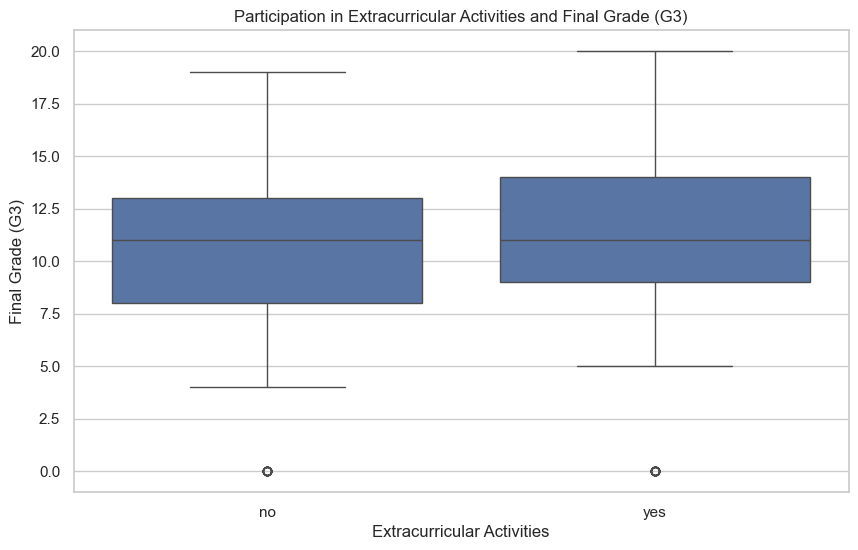

In [23]:
# Distribution of students by study time and their final grades
plt.figure(figsize=(10,6))
sns.boxplot(x='studytime', y='G3', data=df_student)
plt.title("Study Time and Final Grade (G3)")
plt.xlabel("Study Time")
plt.ylabel("Final Grade (G3)")
plt.show()

# Distribution of students based on extracurricular activities
plt.figure(figsize=(10,6))
sns.boxplot(x='activities', y='G3', data=df_student)
plt.title("Participation in Extracurricular Activities and Final Grade (G3)")
plt.xlabel("Extracurricular Activities")
plt.ylabel("Final Grade (G3)")
plt.show()

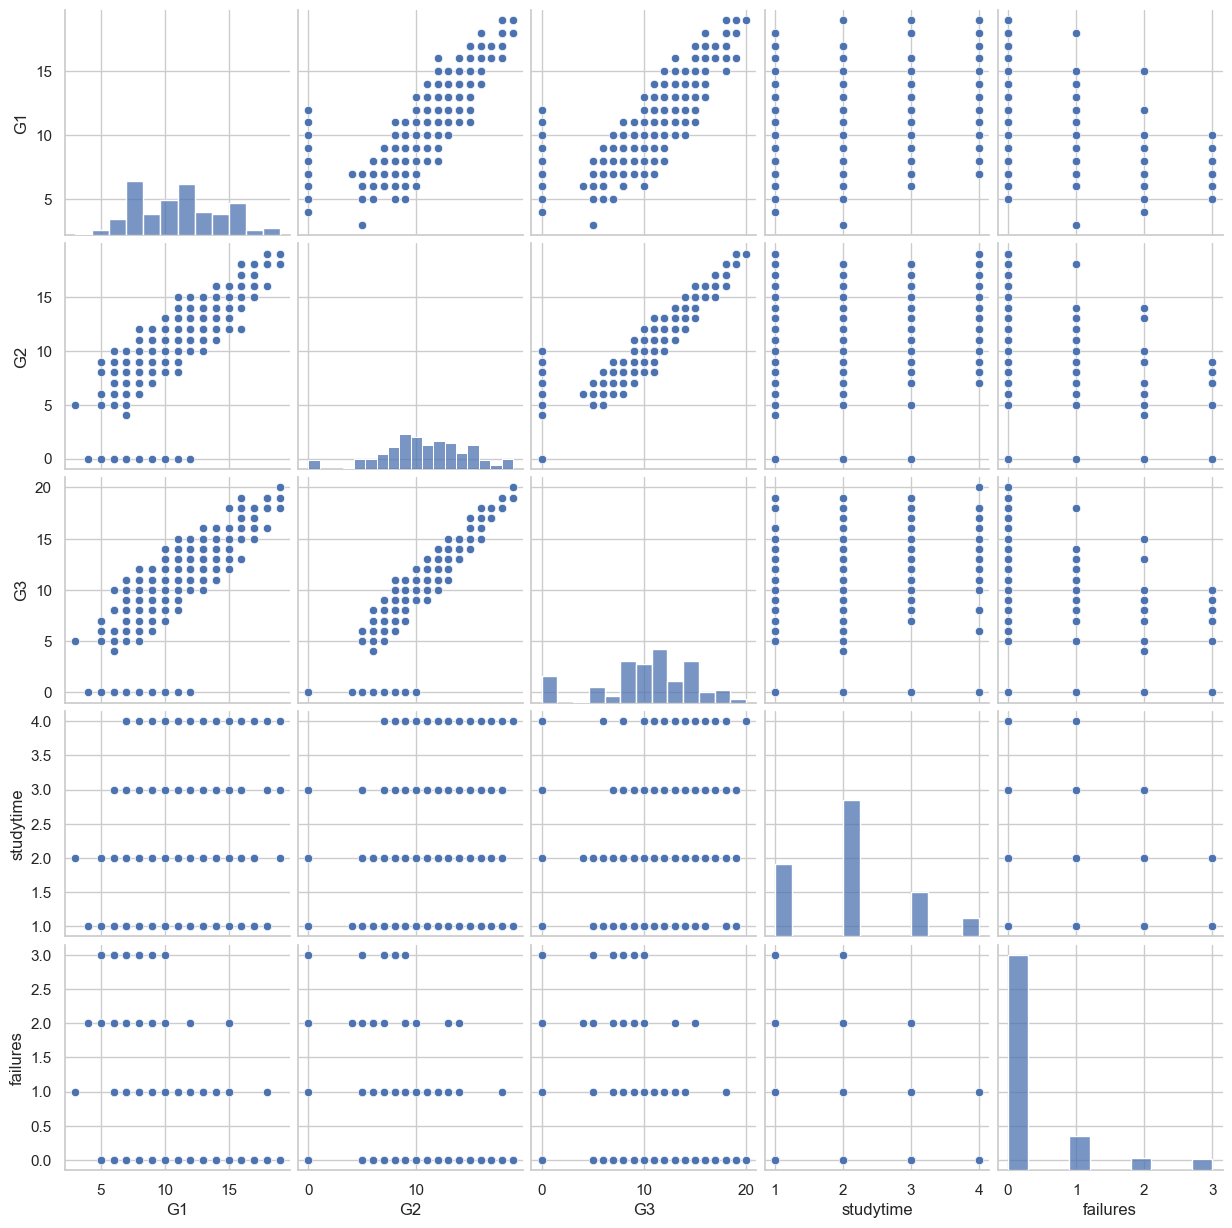

In [120]:
sns.pairplot(df_student[['G1', 'G2', 'G3', 'studytime', 'failures']])
plt.show()

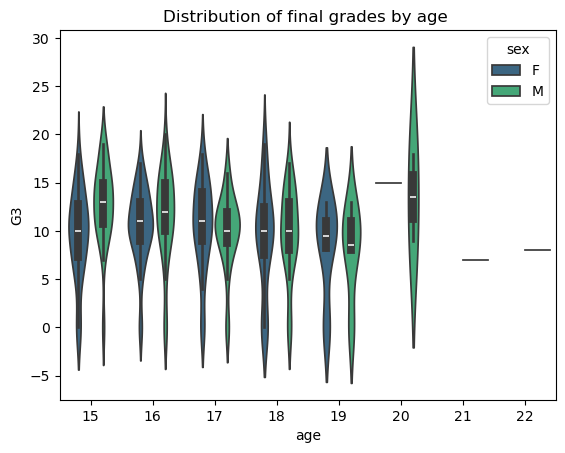

In [20]:
sns.violinplot(x="age", y="G3", data=df_student, hue="sex", palette="viridis")
plt.title("Distribution of final grades by age ")
plt.xlabel("age")
plt.ylabel("G3")
plt.show()

<span style="font-size: 24px; font-weight: bold;">Phase 3: Mathematical Foundation Applications</span></br>

**Phase 3.1: Singular Value Decomposition (SVD) for Feature Reduction**</br>


In [8]:
from scipy.linalg import svd 

cov_matrix =np.cov(X_scaledfeatures.T) 
print("Cov matrix", cov_matrix)
def perform_svd(df_student, n_components=10):
    
    # Standardise the Data using StandardScaler() (mean=0, variance=1)
    # Features are already standardized during phase 1

    # Performing SVD
    U, S, Vh = svd(X_scaledfeatures, full_matrices=False)


    
    # Reducing the data to 'n_components' dimensions
    X_reduced = np.dot(X_scaledfeatures, Vh.T[:, :n_components])

    # Return the Transformed Dataset
    return X_reduced

X_reduced = perform_svd(X, n_components=10)

# Output the shapes of the reduced dataset
print("Reduced features shape:", X_reduced.shape)

Cov matrix [[ 1.00253807 -0.1640738  -0.16385289 ... -0.20961147 -0.11237801
   0.16508669]
 [-0.1640738   1.00253807  0.62503749 ...  0.16927307  0.20197478
   0.03978132]
 [-0.16385289  0.62503749  1.00253807 ...  0.17500858  0.12783023
   0.0156421 ]
 ...
 [-0.20961147  0.16927307  0.17500858 ...  1.00253807  0.02042555
  -0.10593264]
 [-0.11237801  0.20197478  0.12783023 ...  0.02042555  1.00253807
   0.08734284]
 [ 0.16508669  0.03978132  0.0156421  ... -0.10593264  0.08734284
   1.00253807]]
Reduced features shape: (395, 10)


In [16]:
print("Reduced Features:", X_reduced[:10]) # first 10 rows of reduced features

Reduced Features: [[ 3.90714847e-01 -2.83817426e-01  4.41191238e-01 -1.87411341e+00
   2.16251507e+00  1.47154024e+00 -3.47026711e+00  3.53165288e-01
   2.35642737e+00 -7.56835710e-01]
 [-1.83499539e+00 -2.32485015e+00 -8.61210675e-02 -1.05919089e+00
   1.62808901e-01 -1.01945443e+00  8.31029647e-02  8.49050780e-01
  -1.03394074e+00  5.42022892e-01]
 [-2.10949821e+00 -6.35083794e-01  5.28477520e-01 -1.54490969e+00
   1.22474489e+00 -9.64555569e-01  3.65105559e-01 -2.63906294e+00
   8.08891930e-01  8.80472100e-01]
 [ 3.14628243e+00 -6.64740609e-01 -1.56560704e+00 -4.55220036e-01
  -3.61774589e-01 -5.70803418e-01 -1.48773245e-01 -1.63524305e+00
  -1.44805491e+00  1.86209873e+00]
 [-2.32200514e-01 -2.01619940e+00  8.92400523e-01 -8.87842018e-01
  -5.00001129e-01 -3.19066403e-01 -1.61464672e+00  2.83694171e-03
  -1.10469545e+00  1.47103899e+00]
 [ 2.49336556e+00  2.08179465e-01  7.68261800e-01  8.53325232e-01
  -3.85324144e-01 -9.95970087e-01  1.98613492e+00  5.89019554e-01
   1.25292213e+

**Splitting the data for testing and training**

In [79]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets : 80% for training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_train)

(316, 10)
[[ 1.25035571 -0.19180005  0.36403267 ... -0.99247671 -0.52897373
  -0.85739515]
 [-0.26112488 -1.04115388  0.97133876 ...  0.80862932 -0.68261261
   0.55185694]
 [-1.82341044 -0.03966693 -1.66301043 ...  0.17744433 -1.26472076
  -0.49819288]
 ...
 [-1.88597022  1.52227927 -2.33985428 ...  0.92128851 -1.3571243
   0.03247667]
 [ 2.57405616 -0.48918978  0.39256748 ...  0.45719543  0.31644128
   1.4304588 ]
 [ 1.41763384  0.21471001  1.12857259 ...  1.6772558   0.21873925
  -0.29044236]]


**Training of Model: Linear Regression**

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initializing and training the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

target_variance=np.var(y)
print("Variance of G3", target_variance)
# Making predictions
y_pred = linear_model.predict(X_test)

print("Predicted Values: ", y_pred)

#Evaluate the model by using MSE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Variance of G3 20.93647812850505
Predicted Values:  [ 2.59180508 10.30562808  3.58645139  9.73974287  8.2678519  11.19453842
 17.37152579  8.82186577  8.5394517  11.55406495 14.20774744  6.51176053
 11.97857299 12.71522926 14.16726814  8.43121772  7.57586362 10.22992259
 15.49159696  9.18936053 14.3213814  15.61384588 14.94152175  4.76819515
  6.72032354 19.43324748 11.72853889 11.86332165 15.84824471 12.39413089
  6.02497148  7.0143826  15.78765811 10.34416982  6.66055066  5.08433999
  0.64291303 13.98674524 12.97649486  5.08633685  2.38947525  8.57740078
 11.20801383  8.95190967 14.67336235  9.37255366 11.31090273 11.64766976
  9.38062639 15.75730498 11.11805557 15.41325855 11.16112217  9.40615035
  3.98223376 10.61500542 12.15451992  5.76378641 16.74382924 16.45075622
 13.9714604   8.83964847  3.20524417  7.70226379  6.1151967  15.24015729
  9.27198917 10.38117071  8.51335395 16.85952674  7.76711451  8.68467992
 15.17835039 19.13013328  9.88687249  8.80677004 10.94158532 14.06707792

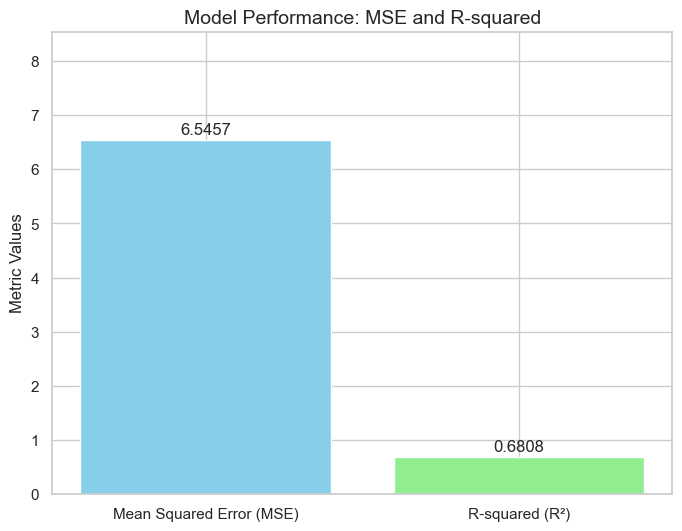

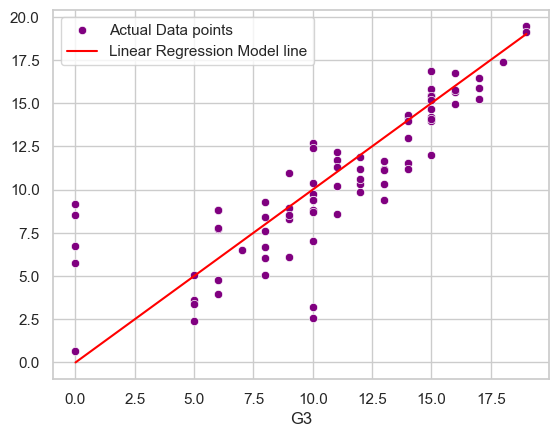

In [83]:
# Define the metrics
metrics = ['Mean Squared Error (MSE)', 'R-squared (R²)']
values = [6.545738449095262,  0.6807742813990285]

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen'])

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 4), ha='center', va='bottom')

# Set title and labels
plt.title("Model Performance: MSE and R-squared", fontsize=14)
plt.ylabel("Metric Values")
plt.ylim(0, max(values) + 2)
plt.show()

#Draw regression model line
sns.scatterplot(x=y_test, y=y_pred, color='purple', label="Actual Data points")
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], color="red", label="Linear Regression Model line")
plt.legend()
plt.show()

**Phase 3.2: Model Optimization Using Gradient Descent**</br>


Iteration 0: Cost = 64.7063
Iteration 100: Cost = 10.3138
Iteration 200: Cost = 3.8953
Iteration 300: Cost = 3.0470
Iteration 400: Cost = 2.9337
Iteration 500: Cost = 2.9185
Iteration 600: Cost = 2.9165
Iteration 700: Cost = 2.9162
Iteration 800: Cost = 2.9162
Iteration 900: Cost = 2.9162
Final Weights: [ 1.23420423  0.20608292 -0.14130744  1.84650811 -0.57196455 -0.42312072
  0.37417865 -0.27139212  0.49695066  0.21974763 -0.56498718 -0.10033538
 -0.52930401  0.0711332   0.27544354]
Final Bias: 10.414740236678862


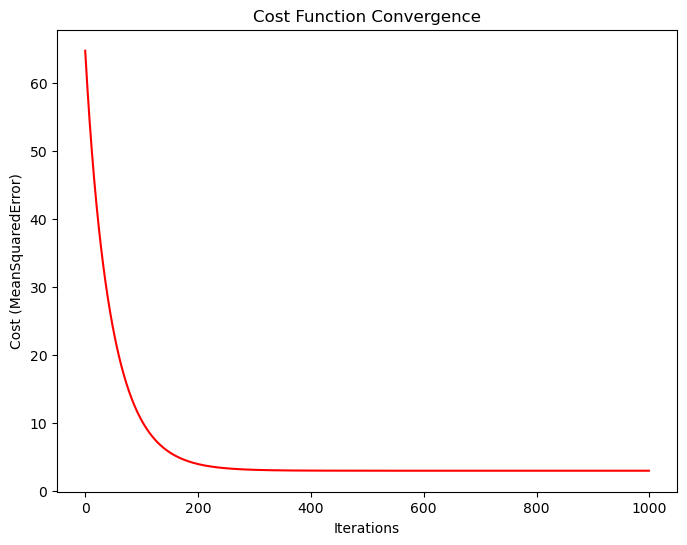

In [46]:
# Gradient Descent function for Linear Regression
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    n_samples, n_features = X.shape
    # Initialize hyperparameters- weights and bias
    weights = np.zeros(n_features)
    bias = 0
    cost_history = []

    for i in range(n_iterations):
        # Linear regression model prediction
        y_pred = np.dot(X, weights) + bias
        
        # Calculate the gradients
        dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
        db = (1/n_samples) * np.sum(y_pred - y)
        
        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        # Calculate the cost (MSE)
        cost = (1/(2*n_samples)) * np.sum((y_pred - y)**2)
        cost_history.append(cost)
        
        # Print cost for every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    
    
    return weights, bias, cost_history

# Gradient descent on the SVD-transformed dataset
weights, bias, cost_history = gradient_descent(X_reduced, y, learning_rate=0.01, n_iterations=1000)

# Final weights and bias after optimization
print("Final Weights:", weights)
print("Final Bias:", bias)

# Plot cost history to visualize convergence
plt.figure(figsize=(8,6))
plt.plot(range(1000), cost_history, color='red')
plt.title("Cost Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost (MeanSquaredError)")
plt.show()